In [1]:
import csv
import re
import gensim 
from random import random
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import nltk
import html
import numpy as np
import scipy as sp
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')


def writeFile(li, filename, dataindex):
    p = open(filename, "w")
    for i in li:
        l = i[dataindex]
        l = re.sub(r"(^| )[0-9]+($| )", r" ", l)  # Remove digits
        l = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",l)
        l = re.sub(r"\bhttp\S+\b", r"", l)
        l = l.lower()
        print(l.encode('utf8', 'ignore').decode('utf8'), file=p)
        #.encode("utf8","ignore")
   
    p.close()
    
def write_allFile(li, filename):
    p = open(filename, "w")
    for i in li:
        l =(str(i[1])+" "+str(i[2]))
        l = re.sub(r"(^| )[0-9]+($| )", r" ", l)  # remove digits
        l = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",l)
        l = re.sub(r"\bhttp\S+\b", r"", l)
        l = l.lower()
        #line = re.sub(r"(^| )[0-9]+($| )", r" ", line)
        print(l.encode('utf8', 'ignore').decode('utf8'), file=p)
        #.encode("utf8","ignore")
   
    p.close()
    
def write_simple(li,filename):
    p = open(filename, "w")
    for alltext in li:
        alltext = html.unescape(alltext)
        alltext = alltext.rstrip()
        alltext = re.sub("\n", " ", alltext)
        alltext = re.sub(r"(^| )[0-9]+($| )", r" ", alltext)  # remove digits
        alltext = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",alltext)
        alltext = re.sub(r"\bhttp\S+\b", r"", alltext)
        alltext = re.sub(r"RT\s*@[^:]*:\s*.*",r" ",alltext)
        alltext = re.sub('#\S+', '', alltext)
        alltext = re.sub('RT|cc', '', alltext)
        alltext = re.sub("&amp; *", "", alltext)
        alltext = re.sub("&gt; *", "", alltext)
        alltext = alltext.rstrip()

        print(alltext.encode('utf8', 'ignore').decode('utf8'), file=p)
    p.close()
    
    
train_file = "train.csv"
test_file = "test.csv"
# Write output to seperate files
positive_labels_training_texts = []
negative_labels_training_texts = []
zero_labels_training_texts = []
all_training_text = []

count = 0
'''Set index of target. For example crude oil 5min =4 30min=5 12hour=6,
Gold 5min=7 30min=8 12hour =9
USD index 5min=10 30min=11 12hours=12'''

indexNum = 8

all_train_data = []
with open(train_file, "U") as in_file1:
    reader1 = csv.reader(in_file1)
    for row1 in reader1:
        all_train_data.append(row1)
all_test_data = []
with open(test_file, "U") as in_file1:
    reader1 = csv.reader(in_file1)
    for row1 in reader1:
        all_test_data.append(row1)

        
#print(all_test_data[2])
#print(all_train_data[5:])
totalCount = 0
totallen = 0

for l in all_train_data:
    if count >= 1:
        #print(l[1])
        ind = int(l[indexNum])
        curtext = l[0]
        curlen = len(curtext.split())
        all_training_text.append(curtext)
        
        totallen += curlen
        totalCount += 1
        if ind > 0:
            positive_labels_training_texts.append(curtext)
        elif ind < 0:
            negative_labels_training_texts.append(curtext)
        else:
            zero_labels_training_texts.append(curtext)
    count += 1
       
        
print("The total length of tweets is " + str(totallen))
print("The number of tweets is " + str(totalCount))
print("The average is " + str(totallen/totalCount))

#writeFile(positive_labels_training,"postrain.txt",2)
#writeFile(negative_labels_training,"negtrain.txt",2)
write_simple(positive_labels_training_texts,"postrain.txt")
write_simple(negative_labels_training_texts,"negtrain.txt")
write_simple(zero_labels_training_texts,"zerotrain.txt")
write_simple(all_training_text,"alltrain.txt")

#print("done")



The total length of tweets is 64786
The number of tweets is 2362
The average is 27.428450465707026


In [2]:
'''
Gensim model
'''
import html
alltext = ""   
toksents = [] 


f = open("allTrump.txt", encoding="utf-8")

# Read in the whole file into a string called alltext
alltext = f.read().rstrip()
f.close()
alltext = html.unescape(alltext)
alltext = re.sub("\n", " ", alltext)
alltext = re.sub(r"(^| )[0-9]+($| )", r" ", alltext)  # remove digits
alltext = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",alltext)
alltext = re.sub(r"\bhttp\S+\b", r"", alltext)
alltext = re.sub(r"RT\s*@[^:]*:\s*.*",r" ",alltext)
alltext = re.sub('#\S+', '', alltext)
#alltext = re.sub('@\S+', '', alltext)
#alltext = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), '', alltext)# remove punctuations
alltext = re.sub('RT|cc', '', alltext)
alltext = re.sub("&amp; *", "", alltext)
alltext = re.sub("&gt; *", "", alltext)
alltext = alltext.rstrip()


alltext = alltext.lower()

tok = nltk.sent_tokenize(alltext)
toksents=[]
for l in tok:
    w = nltk.word_tokenize(l)
    toksents.append(w)


['great', 'president', 'people', 'trump', 'democrats', 'country', 'news', 'thank', 'big', 'fake']


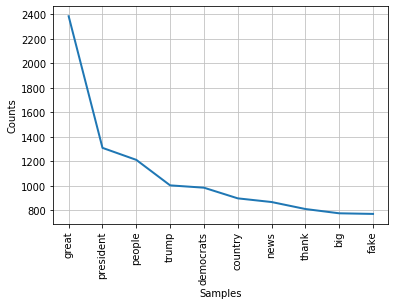

In [3]:
alltokens = nltk.word_tokenize(alltext)
fdist = nltk.FreqDist(alltokens)

# Remove some stop words to create distribution graph
from nltk.corpus import stopwords
stoplist = stopwords.words('english')

newAllTokens = []
for i in alltokens:
    if i not in stoplist:
        newAllTokens.append(i)
fdist = nltk.FreqDist(newAllTokens)
#print(fdist.most_common(50))
#print(type(fdist))
most_freq_words = []
for i in fdist.most_common(10):
    most_freq_words.append(i[0])
print(most_freq_words)
fdist.plot(10, cumulative = False)

In [4]:
dimension = 100
model = gensim.models.Word2Vec(toksents, size=dimension, window=5, min_count=5, workers=4)
#bigmodel = gensim.models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300-SLIM.bin", binary=True)
print("The model is loaded.")

The model is loaded.


In [5]:
# Training the data and creating vectors with clean data
def create_vectors(filename, lines, tokens):

    f = open(filename)
    for l in f:
        l = l.rstrip()
        lines.append(l)    
        l = re.sub(r"(^| )[0-9]+($| )", r" ", l)  # remove digits
        l = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",l)
        l = re.sub(r"\bhttp\S+\b", r"", l)
        l = html.unescape(l)
        #alltext = alltext.rstrip()
        l = re.sub("\n", " ", l)
        l = re.sub(r"(^| )[0-9]+($| )", r" ", l)  # remove digits
        l = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",l)
        l = re.sub(r"\bhttp\S+\b", r"", l)
        l = re.sub(r"RT\s*@[^:]*:\s*.*",r" ",l)
        l = re.sub('#\S+', '', l)
        #alltext = re.sub('@\S+', '', alltext)
        #alltext = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), '', alltext)# remove punctuations
        l = re.sub('RT|cc', '', l)
        l = re.sub("&amp; *", "", l)
        l = re.sub("&gt; *", "", l)
        l = l.rstrip()


        addme = [t.lower() for t in l.split()]
        tokens.append(addme)
    f.close()
    return tokens,lines


train_pos_vecs = []
train_pos_lines = []
train_pos_vecs,train_pos_lines = create_vectors("postrain.txt",train_pos_lines,train_pos_vecs)

train_neg_vecs = []
train_neg_lines = []
train_neg_vecs,train_neg_lines = create_vectors("negtrain.txt",train_neg_lines,train_neg_vecs)

train_zero_vecs = []
train_zero_lines = []
train_zero_vecs,train_zero_lines = create_vectors("zerotrain.txt",train_zero_lines,train_zero_vecs)

print("Done")

Done


In [6]:
#print(train_pos_vecs[10])
#print(train_pos_lines[10])
#print(train_neg_vecs[6])
#print(train_neg_lines[6])
#print(train_zero_vecs[6])
#print(train_zero_lines[6])
#print(len(train_zero_vecs))

In [7]:
#print (len(output))
#print(len(training_data_from_output))
#print(len(testing_data_from_output))
#print(len(positive_labels_training))
#print(len(negative_labels_training))

In [8]:
# Creating own vectors

posvectors = []       # This list will contain one 300-dimensional vector per clickbait headline
for h in train_pos_vecs:
    totvec = np.zeros(dimension)
    for w in h:
        if w.lower() in model:
            totvec = totvec + model[w.lower()]
    posvectors.append(totvec)

#print(len(train_pos_vecs))
#print(len(posvectors))
#print(len(posvectors[10]))

In [9]:
negvectors = []       # this list will contain one 300-dimensional vector per clickbait headline
for h in train_neg_vecs:
    totvec = np.zeros(dimension)
    for w in h:
        if w.lower() in model:
            totvec = totvec + model[w.lower()]
    negvectors.append(totvec)

print(len(train_neg_vecs))
print(len(negvectors))
print(len(negvectors[10]))

1102
1102
100


In [10]:
zerovectors = []       # this list will contain one 300-dimensional vector per clickbait headline
for h in train_zero_vecs:
    totvec = np.zeros(dimension)
    for w in h:
        if w.lower() in model:
            totvec = totvec + model[w.lower()]
    zerovectors.append(totvec)

#print(len(train_zero_vecs))
#print(len(zerovectors))
#print(len(zerovectors[10]))

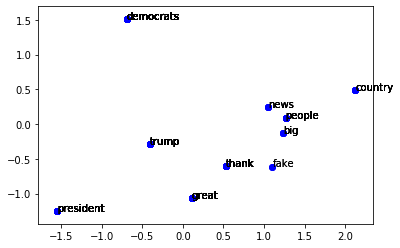

In [11]:
#print (alltoks[0])
vecwords = []  
vecs = []    
for k in toksents:
    for a in k:
        if a in most_freq_words:
            try:
                kvec = model[a]
                vecs.append(kvec)
                vecwords.append(a)
            except:
                pass
    
#print(len(vecs))
vecs = vecs[:100]
pca = PCA(n_components=2, whiten=True)
vectors2d = pca.fit(vecs).transform(vecs)
#print(type(vectors2d))
#print(vecwords[15])
#print("here2")
#print(vectors2d[15])
for point, word in zip(vectors2d, vecwords):
    plt.scatter(point[0], point[1], c='b')
    plt.annotate(
        word, 
        xy = (point[0], point[1]),
        )




In [12]:
# Compare test data

from scipy.spatial.distance import cdist
from sklearn import metrics


testtargets = []  
testvectors = []  

textlines = []    
textlinetoks = [] 
    
count = 0
for l in all_test_data:
    if count >= 1:
        ind = int(l[indexNum])
        curtext = l[0]
        testtargets.append(ind)
        addme = [t.lower() for t in curtext.split()]
        totvec = np.zeros(dimension)
        for h in addme:
            if h.lower() in model:
                totvec = totvec + model[h.lower()]
        testvectors.append(totvec)

    count += 1

print (len(testvectors))
print(len(testvectors[100]))
print(len(testtargets))

pos_d = sp.spatial.distance.cdist(testvectors, posvectors)
neg_d = sp.spatial.distance.cdist(testvectors, negvectors)
zero_d = sp.spatial.distance.cdist(testvectors, zerovectors)
posmins = pos_d.min(axis = 1)
negmins = neg_d.min(axis = 1)
zeromins= zero_d.min(axis =1)

predictedknn = []  
for item1, item2, item3 in zip(negmins, zeromins,posmins):
    if item1 < item2 and item1 < item3:
        predictedknn.append(-1)
    elif item2 < item1 and item2 < item3:
        predictedknn.append(0)
    else:
        predictedknn.append(1)
        


448
100
448


In [13]:
alltargets = list(np.ones(len(posvectors)))
alltargets.extend(np.full_like(np.arange(len(negvectors)), -1))
alltargets.extend(np.zeros(len(zerovectors)))
alltargets = np.array(alltargets)
allvectors = posvectors +negvectors+ zerovectors 
print(len(allvectors[10]))
print(len(allvectors))
print(alltargets[:-5])

100
2362
[1. 1. 1. ... 0. 0. 0.]


In [14]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression


# Naive Bayes text classification

model = GaussianNB()
model.fit(allvectors, alltargets)
train = testtargets
test = model.predict(testvectors)
print("Naive Bayes")
print(metrics.classification_report(train, test))


# Support Vector Machine (SVM)
svm = LinearSVC()
svm.fit(allvectors, alltargets)
svm_train = testtargets

svm_test = svm.predict(testvectors)
print("SVM")
print(metrics.classification_report(svm_train, svm_test))

# K Nearest Neighbors (KNN)
print("K Nearest Neighbors")
print(metrics.classification_report(testtargets, predictedknn))

Naive Bayes
              precision    recall  f1-score   support

          -1       0.54      0.33      0.41       233
           0       0.03      0.31      0.06        16
           1       0.49      0.39      0.43       199

    accuracy                           0.36       448
   macro avg       0.36      0.34      0.30       448
weighted avg       0.50      0.36      0.41       448

SVM
              precision    recall  f1-score   support

          -1       0.51      0.80      0.62       233
           0       0.00      0.00      0.00        16
           1       0.43      0.18      0.25       199

    accuracy                           0.50       448
   macro avg       0.31      0.33      0.29       448
weighted avg       0.46      0.50      0.44       448

K Nearest Neighbors
              precision    recall  f1-score   support

          -1       0.50      0.42      0.45       233
           0       0.00      0.00      0.00        16
           1       0.43      0.51      